# 1.2 Método de la falsa posición (*regula falsi*)

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/1_Ecuaciones_de_una_variable/1.2_Metodo_regula_falsi.ipynb)

In [2]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def graficar(f, x_i, x_f, num=1000):
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: figura y objeto de ejes para la gráfica de la función
    """
    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    # Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
    x = np.linspace(x_i, x_f, num)
    # Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
    # figsize se utiliza para establecer el tamaño de la figura.
    fig, ax = plt.subplots(figsize=(20,8))
    # Grafica la función f(x) en el objeto de ejes creado anteriormente.
    ax.plot(x, f(x))
    # Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # label size de los ejes
    ax.tick_params(labelsize=20, axis='x')
    ax.tick_params(labelsize=20, axis='y')
    # Agrega flechas a los ejes x e y para indicar su dirección.
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    # Devuelve la figura y el objeto de ejes para que puedan ser manipulados y mostrados según se desee.
    return fig, ax

def met_regula_falsi(f, a, b, tol=1e-4, n=50, verbose=True):
    """
    Método de la falsa posición para encontrar la solución de la ecuación f(x) = 0.

    :param f: Función previamente definida a la que se le intenta encontrar una solución.
    :param a: Límite inferior del intervalo.
    :param b: Límite superior del intervalo.
    :param tol: Tolerancia para el criterio de parada (por defecto, 1e-4).
    :param n: Número máximo de iteraciones para el criterio de parada (por defecto, 50).
    :param verbose: Si se debe imprimir información de la iteración en cada paso (por defecto, True).

    :return: Solución exacta o aproximada, si existe.
    """

    # Comprobar si el intervalo es válido para el método de bisección
    if not f(a) * f(b) < 0:
        print(f'El intervalo no funciona: f({a})={f(a):.2f}, f({b})={f(b):.2f}')
        return None

    # Inicializar variables
    i = 1
    p_0 = a

    # Realizar iteraciones
    while i <= n:

        # Calcular punto de corte de la recta con el eje
        p_i = a - (f(a) * (b - a)) / (f(b) - f(a))  # falsa posición
        e_abs = abs(p_0 - p_i)

        # Imprimir información
        if verbose:
            print(f'ite {i:<2}: a_{i - 1:<2} = {a:.4f}, b_{i - 1:<2} = {b:.4f}, p_{i:<2} = {p_i:.5f}'
                f' | e_abs: {e_abs:e}')

        # Si encontramos la solución exacta, retornarla
        if f(p_i) == 0:
            print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Actualizar intervalo
        if f(a) * f(p_i) < 0:
            b = p_i
        else:
            a = p_i

        # Actualizar variables y lista de errores
        p_0 = p_i

        # Si la tolerancia se ha alcanzado, retornar solución
        if e_abs < tol:
            print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Incrementar contador
        i += 1

    print('solución no encontrada, iteraciones agotadas')
    return None

## Introducción

El método de la falsa posición es un método numérico para encontrar una solución aproximada de una ecuación de la forma $f(x) = 0$ en un intervalo dado. Este método se basa en la idea de buscar la posición en donde se intersecan la línea recta que conecta los puntos y con el eje-$x$. La idea principal de este método es similar a la del método de bisección, pero en lugar de dividir el intervalo en partes iguales, se utiliza una estimación de la solución por medio de la recta para encontrar la nueva aproximación, de aqui el nombre de *falsa posición (regula falsi)*.

Similar al método de bisección, este método requiere que la función sea continua en el intervalo dado y que los valores de la función en los extremos del intervalo tengan signos opuestos. Si estos requisitos se cumplen, el método de la falsa posición converge a una solución única en un número finito de iteraciones.

En cada iteración, se calcula la intersección de la línea recta que conecta los puntos y con el eje-$x$, y se utiliza esta intersección como la nueva aproximación de la solución. Si el valor de la función evaluada en la nueva aproximación tiene el mismo signo que el valor de la función evaluada en el extremo del intervalo opuesto a la nueva aproximación, entonces se reemplaza el extremo del intervalo con la nueva aproximación. De lo contrario, se reemplaza el extremo opuesto con la nueva aproximación. Este proceso es el mismo que se utiliza para escoger el nuevo intervalo en el método de bisección, y se repite hasta que se alcance una precisión deseada.

Aunque el método de la falsa posición es más rápido que el método de bisección, tiene algunas desventajas. En particular, si la función no cumple con las condiciones mencionadas, el método no siempre converge y puede oscilar alrededor de la solución. Además, el método de la falsa posición puede ser sensible a la elección de la primera aproximación y puede converger a soluciones erróneas si la primera aproximación es demasiado lejos de la solución real. A pesar de estas desventajas, el método de la falsa posición es útil para resolver ecuaciones no lineales en una variable y puede ser una buena opción cuando se requiere una precisión moderada.

## Condiciones
La idea detrás del método de falsa posición se puede expresar de la misma manera que el método de bisección:

> Dada una función $f(x)$ continua sobre un intervalo $[a, b]$ donde $f(a) \cdot f(b) < 0$, la función tiene una raíz entre $[a, b]$.

Por el [Teorema del valor intermedio](https://es.wikipedia.org/wiki/Teorema_del_valor_intermedio) y el [Teorema de Bolzano](https://es.wikipedia.org/wiki/Teorema_de_Weierstrass) sabemos que: sí la function es continua sobre un intervalo cerrado $[a, b]$, $f(a)$ y $f(b)$ son de signos opuestos, esto implica que entre $a$ y $b$ existe al menos un $c$ tal que $f(c) = 0$.

El siguiente código ilustra la iteración del método de falsa posición para encontrar una solución de la ecuación $ e^x - 3 \sin(x) - 3x = 0$ en el intervalo $[0.5, 2]$. Los puntos `*`  en la gráfica de la función $f(x)$ indican cómo la sucesión se acerca a la solución de $f(x)=0$, la cual está representada por la intersección de la curva con el eje $x$. Lo invitamos a comparar la convergencia de los métodos vistos para que identifique sus regularidades y diferencias.
(*Nota*: Puede modificar el código probando con otra función y modificando el intervalo, la toleracia y el máximo número de iteraciones)

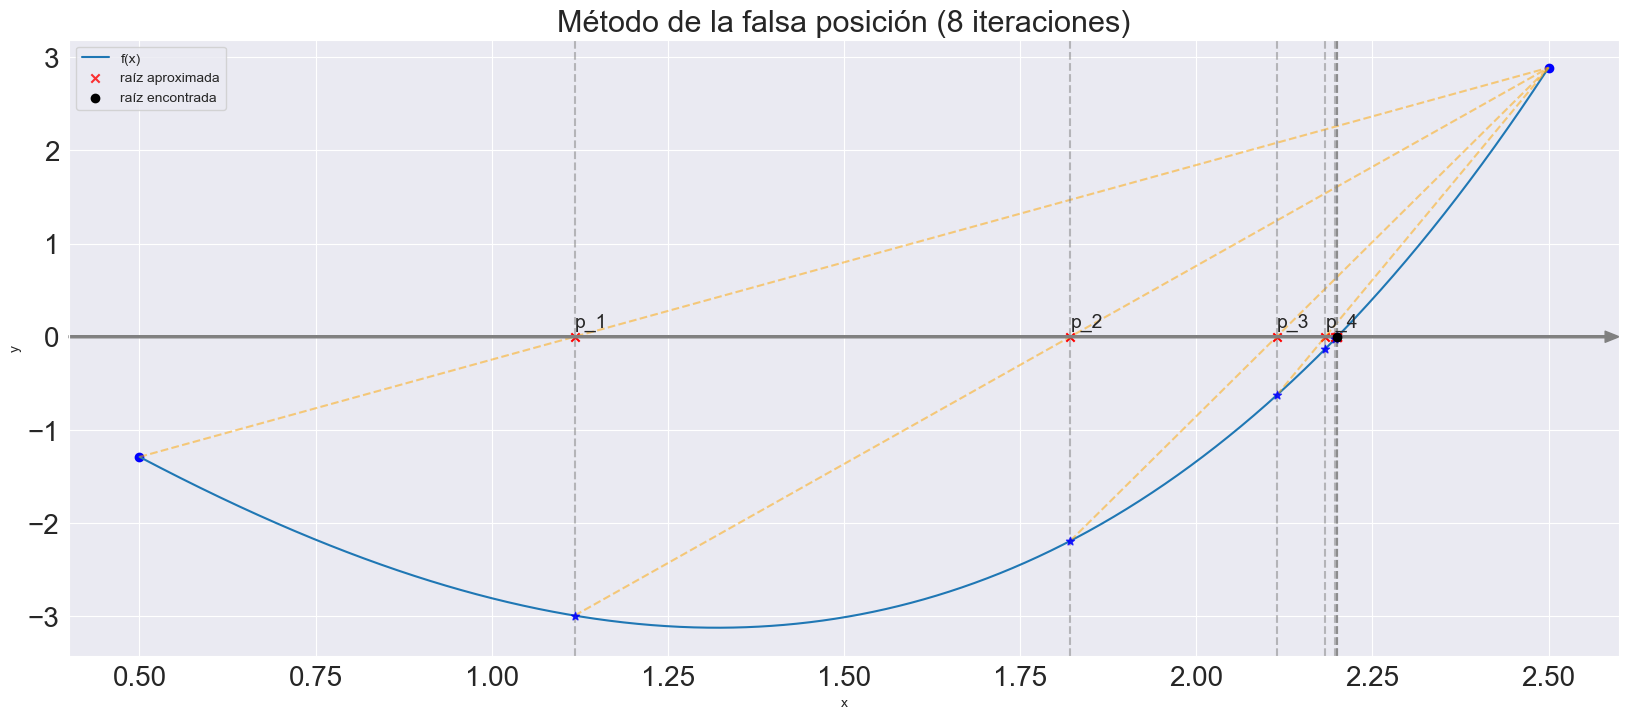

La secuencia para encontrar la solución fue: [1.1175, 1.8211, 2.114, 2.183, 2.1968, 2.1994, 2.1999, 2.2]


In [18]:
# EJECUTAR ESTA CELDA
# Definir la función
f = lambda x: np.e**x - 3*np.sin(x) - 3*x

# Definir el intervalo, tolerancia y No. máximo de iteraciones
a, b = 0.5, 2.5
tolerancia = 1e-4
max_ite = 100

# Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
x = np.linspace(a, b, 1000)
# Inicializar la lista de aproximaciones
lista_sol = list()


sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
# Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
# figsize se utiliza para establecer el tamaño de la figura.
fig, ax = plt.subplots(figsize=(20, 8))
# Graficar la función
ax.plot(x, f(x), label='f(x)')
ax.scatter(a, f(a), color='blue')
ax.scatter(b, f(b), color='blue')

# Iterar hasta que la tolerancia sea alcanzada o se supere el número máximo de iteraciones
ite, p_0 = 1, a
while ite <= max_ite:
    p_i = a - (f(a) * (b - a)) / (f(b) - f(a))  # falsa posición
    # Agregar c a la lista de aproximaciones
    lista_sol.append(round(p_i,4))

    # Graficar la línea vertical en p_i y el punto en la grafica
    ax.axvline(x=p_i, linestyle='--', color='gray', alpha=0.5, zorder=2)
    ax.scatter(p_i, f(p_i), color='blue', alpha=0.8, marker='*', zorder=3)
    ax.scatter(p_i, 0, color='red', alpha=1, marker='x', zorder=2)
    # texto
    if ite <= 4:
        plt.text(p_i, 0.1, f"p_{ite}", fontsize=14)
        plt.plot([a, b], [f(a), f(b)], '--', color='orange', alpha=0.5, zorder=2)
    # Actualizar el intervalo
    if f(p_i) == 0:
        break
    elif f(a)*f(p_i) < 0:
        b = p_i
    else:
        a = p_i

    if abs(p_i-p_0) < tolerancia:
        break
    p_0 = p_i
    ite += 1

# Graficar el punto final encontrado
ax.scatter(p_i, 0, color='red', alpha=0.8, marker='x', label='raíz aproximada')
ax.scatter(p_i, f(p_i), color='black', label='raíz encontrada', zorder=3)

### EJES ###
# Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
# label size de los ejes
ax.tick_params(labelsize=20, axis='x')
ax.tick_params(labelsize=20, axis='y')
# Agrega flechas a los ejes x e y para indicar su dirección.
ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)

# Configurar la gráfica
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Método de la falsa posición ({ite} iteraciones)', fontsize=22)
plt.show()
print(f'La secuencia para encontrar la solución fue: {lista_sol}')

## Fórmula
Este método generalmente tiende a converger a la solución más rápido que el método de bisección. Los algoritmos solo se diferencian en el punto del intervalo que calculan. Mientras en bisección es el punto medio, en la falsa posición es el corte con el eje-$x$ de la recta que une los puntos extremos del intervalo $[a, b]$.

En el n-ésimo intervalo, si $a_n$ y $b_n$ son los extremos del intervalo, entonces la ecuación de la recta que contiene los puntos $(a_n, f(a_n))$ y $(b_n, f(n))$ es
$$y=\frac{f(b_n) - f(a_n)}{b_n-a_n}(x-a_n)+f(a_n)$$
para hallar el corte con el eje-$x$ se debe reemplazar $y=0$ y $x=p_{n+1}$, así
$$0=\frac{f(b_n) - f(a_n)}{b_n-a_n}(p_{n+1}-a_n)+f(a_n)$$
al despejar $p_{n+1}$ se llega a la fórmula del método:
$$p_{n+1} = a_n - \frac{f(a_n) * (b_n - a_n)}{f(b_n) - f(a_n)}$$

## Método falsa posición paso a paso:

**Paso 1**: Seleccionar un intervalo $[a, b]$ que encierre la raíz y verifique que la función cambie de signo en el intervalo mediante $f(a) \cdot f(b) < 0$.

**Paso 2**: Calcular el valor donde se intersecta el eje-$x$ con la recta que pasa por los puntos $(a,f(a)$ y $(b,f(b)$, la fórmula utilizada es $p_i = a - (f(a) * (b - a)) / (f(b) - f(a))$.

**Paso 3**: Comprobar si $f(p_i) = 0$, si es así, el método finaliza, de lo contrario continúa.

**Paso 4**: Determinar en qué subintervalo está la raíz mediante las siguientes evaluaciones:

* Si $f(p_i) \cdot f(a) < 0$, entonces la raíz está en el subintervalo derecho $[p_i, b]$. Por lo tanto, se actualiza $a = p_i$, se mantiene $b$ y se vuelve al paso 2.
* Si $f(p_i) \cdot f(b) > 0$, entonces la raíz está en el subintervalo izquierdo $[a, p_i]$. Por lo tanto, se actualiza $b = p_i, se mantiene $a$ y se vuelve al paso 2.

Se repiten los pasos 2 al 4 hasta alcanzar una tolerancia de error deseada o hasta que se agoten el número de iteraciones permitido.

A pesar de que el método de falsa posición converge más rápidamente que el método de bisección, puede oscilar alrededor de la solución y no siempre converge. Por lo tanto, es importante tener en cuenta las limitaciones de este método al utilizarlo en la resolución de problemas numéricos.

## Ejemplos
### Ejemplo práctico 1: Resolución de Ecuación no Lineal mediante el método de falsa posición

Resolver la ecuación $x^3 + 5x - 1 = 0$ con una toleracia de $10^{-4}$ utilizando el método de la falsa posición.

Para utilizar el método de la falsa posición para solucionar la ecuación $x^3 + 5x -1 = 0$, primero debemos tener dos valores iniciales $a$ y $b$ tales que $f(a)$ y $f(b)$ tengan signos opuestos. Luego, podemos encontrar la intersección de la línea recta que une los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$, que será nuestra nueva aproximación $p_1$. Este proceso se repite hasta que se alcance la precisión deseada.

Empecemos por elegir $a = -2$ y $b = 2$. Entonces, evaluamos la función $f(x)$ en estos valores:
$f(a)=f(-2)=0^3+5(-2)−1=-19$, $f(b)=f(2)=1^3+5(2)−1=17$
Podemos definir la función y utilizar la función `graficar(f, -2, 2)` para ver su representación gráfica y determinar donde está la solución

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

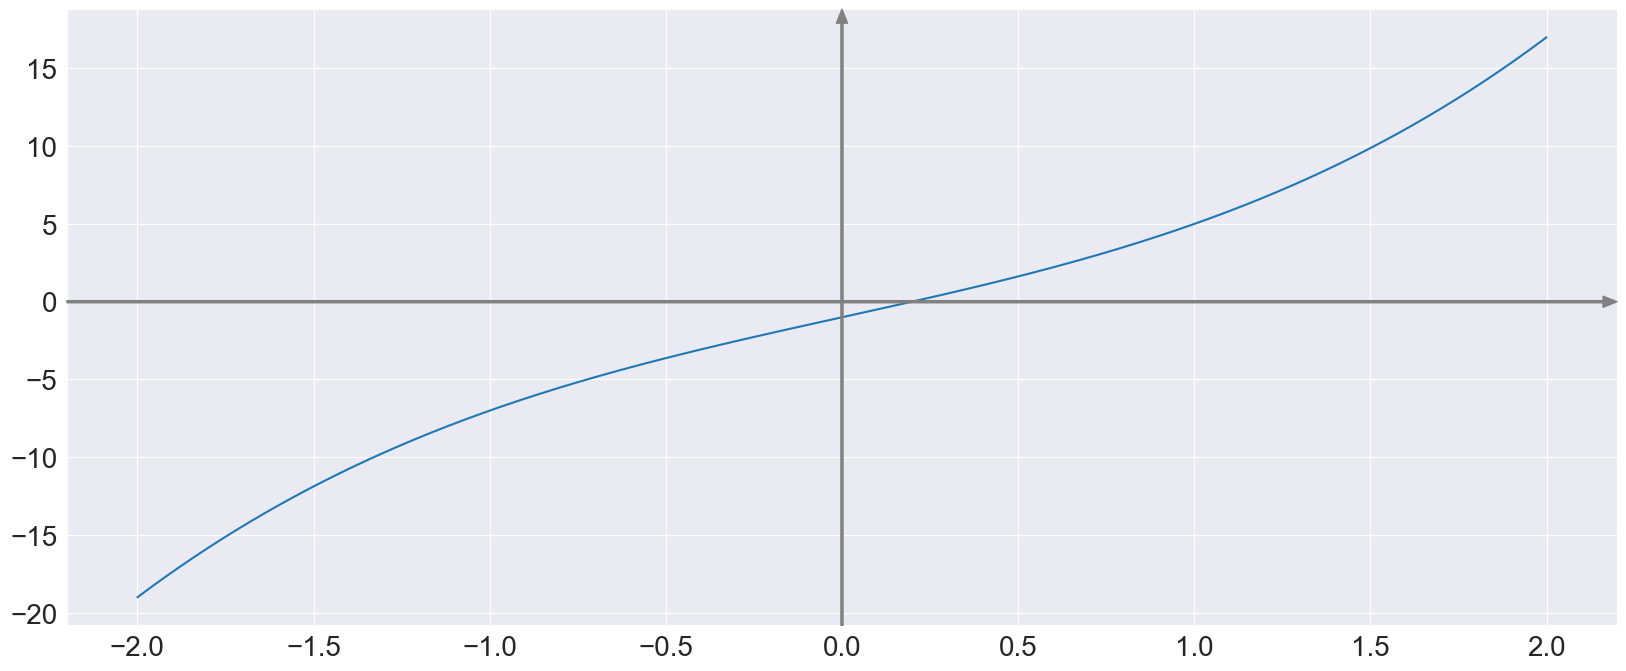

In [8]:
# Función expresada en python
f = lambda x: x**3 + 5*x - 1
graficar(f, -2, 2)

Como $f(a)$ y $f(b)$ tienen signos opuestos, podemos encontrar la intersección de la línea recta que une los puntos $(0, -1)$ y $(1, 5)$ con el eje $x$, a continuación se listan las diferentes iteraciones:

**Iteración 1**:

$$p_1 = a - \frac{f(a)(a-b)}{f(a)-f(b)} = -2 - \frac{((-2)^3 + 5(-2) - 1)(-2-2)}{((-2)^3 + 5(-2) - 1) - ((2)^3 + 5(2) - 1)} \approx 0.11111$$

$$f(p_1) = (p_1)^3 + 5(p_1) - 1 \approx -0.77084$$

como $f(p_1) < 0$, entoces $a_1=p_1$ y $b_1=b$.

**Iteración 2:**
$$p_2 = a - \frac{f(a_1)(a_1-b_1)}{f(a_1)-f(b_1)} =  \approx 0.15909$$

$$f(p_2) = (p_2)^3 + 5(p_2) - 1 \approx -0.200523$$

como $f(p_2) < 0$, entoces $a_2=p_2$. El error absoluto es $E_a = |p_2 - p_1| \approx 4.1919 \times 10^{-2} > 10^{-4}$, continuamos con el proceso.

**Iteración 3:**
$$p_3 = a - \frac{f(a_2)(a_2-b_2)}{f(a_2)-f(b_2)} =  \approx 0.18055$$

$$f(p_3) = (p_3)^3 + 5(p_3) - 1 \approx -0.09136$$

como $f(p_3) < 0$, entoces $a_3=p_3$. El error absoluto es $E_a = |p_3 - p_2| \approx 2.146 \times 10^{-2} > 10^{-4}$, continuamos con el proceso.

Este proceso debe continuar hasta que $E_a < 10^{-4}$, podemos utilizar la función `met_regula_falsi(f, -2, 2, tol=1e-4)` para encontrar la solución con la presición deseada y ver cada paso de la iteración:

In [13]:
met_regula_falsi(f, -2, 2, tol=1e-4)

ite 1 : a_0  = -2.0000, b_0  = 2.0000, p_1  = 0.11111 | e_abs: 2.111111e+00
ite 2 : a_1  = 0.1111, b_1  = 2.0000, p_2  = 0.15909 | e_abs: 4.797980e-02
ite 3 : a_2  = 0.1591, b_2  = 2.0000, p_3  = 0.18055 | e_abs: 2.146081e-02
ite 4 : a_3  = 0.1806, b_3  = 2.0000, p_4  = 0.19028 | e_abs: 9.725199e-03
ite 5 : a_4  = 0.1903, b_4  = 2.0000, p_5  = 0.19471 | e_abs: 4.431077e-03
ite 6 : a_5  = 0.1947, b_5  = 2.0000, p_6  = 0.19673 | e_abs: 2.023736e-03
ite 7 : a_6  = 0.1967, b_6  = 2.0000, p_7  = 0.19766 | e_abs: 9.252565e-04
ite 8 : a_7  = 0.1977, b_7  = 2.0000, p_8  = 0.19808 | e_abs: 4.232342e-04
ite 9 : a_8  = 0.1981, b_8  = 2.0000, p_9  = 0.19827 | e_abs: 1.936401e-04
ite 10: a_9  = 0.1983, b_9  = 2.0000, p_10 = 0.19836 | e_abs: 8.860404e-05
>>> Solución encontrada después de 10 iteraciones: x->0.198362463815727


0.19836246381572686

Por tanto, La solución de $x^3 + 5x - 1 = 0$  es $x \approx 0.19836$.

### Ejemplo 2

Resolver la ecuación $x^{10} -1 = 0$ con una tolerancia de $10^{-5}$

Primero vamos a graficar la ecuación en un intervalo a elección, para este caso el intervalo es $[0, 1.2]$:

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

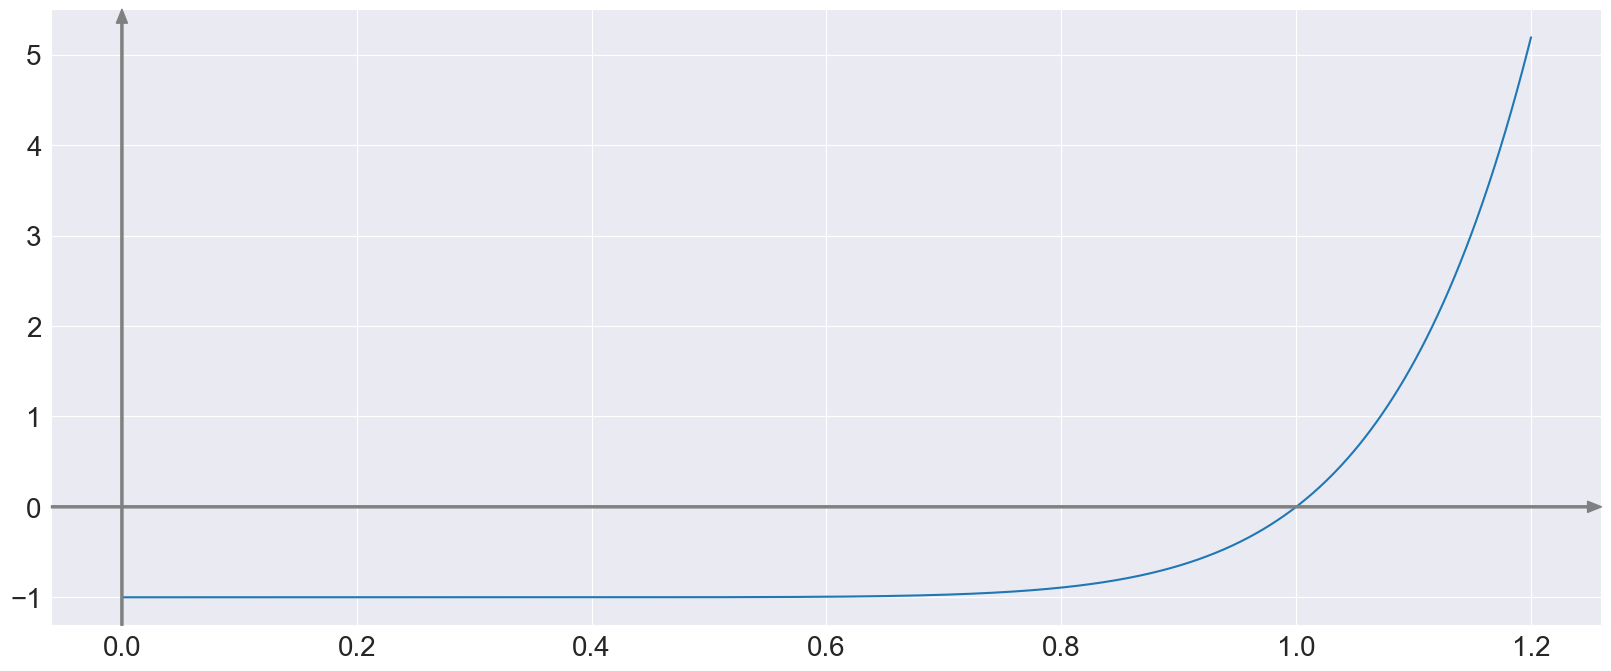

In [14]:
f = lambda x: x**10 - 1
graficar(f, 0, 1.2)

**Datos**
$f(x) = x^{10} -1$
$[a, b] = [0, 1.2]$
$a = 0$, $b = 1.2$
Aproximación = $10^{-15}$

Aplicando el método, obtenemos los siguientes resultados:

In [15]:
met_regula_falsi(f, 0, 1.2, tol=1e-5, n=500)

ite 1 : a_0  = 0.0000, b_0  = 1.2000, p_1  = 0.19381 | e_abs: 1.938067e-01
ite 2 : a_1  = 0.1938, b_1  = 1.2000, p_2  = 0.35631 | e_abs: 1.625058e-01
ite 3 : a_2  = 0.3563, b_2  = 1.2000, p_3  = 0.49257 | e_abs: 1.362565e-01
ite 4 : a_3  = 0.4926, b_3  = 1.2000, p_4  = 0.60674 | e_abs: 1.141735e-01
ite 5 : a_4  = 0.6067, b_4  = 1.2000, p_5  = 0.70201 | e_abs: 9.527059e-02
ite 6 : a_5  = 0.7020, b_5  = 1.2000, p_6  = 0.78047 | e_abs: 7.845796e-02
ite 7 : a_6  = 0.7805, b_6  = 1.2000, p_7  = 0.84340 | e_abs: 6.292635e-02
ite 8 : a_7  = 0.8434, b_7  = 1.2000, p_8  = 0.89193 | e_abs: 4.853266e-02
ite 9 : a_8  = 0.8919, b_8  = 1.2000, p_9  = 0.92767 | e_abs: 3.574009e-02
ite 10: a_9  = 0.9277, b_9  = 1.2000, p_10 = 0.95281 | e_abs: 2.513959e-02
ite 11: a_10 = 0.9528, b_10 = 1.2000, p_11 = 0.96981 | e_abs: 1.699576e-02
ite 12: a_11 = 0.9698, b_11 = 1.2000, p_12 = 0.98095 | e_abs: 1.114112e-02
ite 13: a_12 = 0.9809, b_12 = 1.2000, p_13 = 0.98809 | e_abs: 7.142969e-03
ite 14: a_13 = 0.9881, b_

0.9999865121345071

En el ejemplo de la ecuación $x^{10} -1 = 0$, el método utilizado proporciona una buena aproximación a la solución de $x \approx 0.9999865$, pero no logra llegar a la solución exacta de $x=1$. Este resultado destaca la importancia de evaluar cuidadosamente los métodos numéricos para cada problema en particular, ya que en algunas ocaciones se puede obtener la solución exacta analíticamente.

Adicionalmente, el método requirió 27 iteraciones, mientras que el método de bisección solo necesita 17 iteraciones para alcanzar la misma precisión (se sugiere al lector realizar este ejercicio para confirmar esta afirmación). Este ejemplo ilustra que no se pueden hacer generalizaciones sobre la eficacia de los métodos para resolver ecuaciones, ya que cada problema es único y puede requerir diferentes enfoques. Aunque el método de la falsa posición a menudo es superior al método de bisección, puede haber casos en los que esta conclusión general no se aplique. Por lo tanto, es importante evaluar cuidadosamente los métodos numéricos para cada problema en particular para garantizar resultados precisos y eficientes.

## Conclusiones
En resumen, el método de la falsa posición es un método eficiente y confiable para encontrar la solución de ecuaciones no lineales. Aunque es similar al método de bisección, su convergencia es generalmente más rápida y está garantizada siempre y cuando la función sea continua y tenga un cambio de signo en el intervalo inicial. A diferencia del método de bisección, no se puede aplicar una fórmula que permita calcular el número de iteraciones necesarias para alcanzar la solución con una precisión deseada, lo que puede ser una limitación en algunos casos.

A pesar de sus ventajas, el método de la falsa posición también tiene algunas limitaciones. Por ejemplo, si la función tiene una derivada muy grande o suave cerca de la solución, el método puede oscilar y tardar más en converger. Además, si la función tiene varias raíces en el mismo intervalo, el método puede converger a una solución que no es la deseada. En estos casos, puede ser necesario utilizar métodos alternativos o ajustar los parámetros del método de la falsa posición para obtener una solución precisa. En general, es importante evaluar cuidadosamente las condiciones del problema y las características de la función para determinar el método numérico más adecuado.

## Ejercicios

1. Compare la solución de la $f(x) = -3x^3 - 5x - 2$ en el intervalo $[1, 2]$ con una precisión de $10^{-4}$ obtenida mediante el método de bisección y de la falsa posición.
2. Encuentra la solución de la ecuación $f(x) = e^x - \cos(x)$ en el intervalo $[0, 1]$ con una precisión de $10^{-5}$ obtenida mediante el método de bisección y de la falsa posición.
3. Encuentra la solución de la ecuación $f(x) = \sqrt{x} - \ln(x)$ en el intervalo $[1, 2]$ con una precisión de $10^{-4}$ obtenida mediante el método de bisección y de la falsa posición.
4. Comparar la solución y el número de iteraciones del método de bisección y regula falsi para solucionar encontrar una raíz de la función $f(x)= \ln(x-1) + \cos(x-1)$
5. En álgebra lineal, a cada matriz cuadrada se le puede asociar un polinomio llamado **polinomio característico**, que contiene información importante sobre la matriz. El polinomio característico se define como la función determinante de la matriz menos la matriz identidad multiplicada por una variable. Las raíces de este polinomio son precisamente los *valores propios* de la matriz. Además, el determinante y la traza de la matriz se pueden expresar en términos del polinomio característico y sus derivadas. Por lo tanto, el polinomio característico es una herramienta muy útil para analizar las propiedades de una matriz cuadrada en álgebra lineal. Determina el polinomio característico de la matriz $A$ y encuentre los cuatro *valores propios*.
$$A=\begin{bmatrix}
1 & \sqrt{2} & 0 & \sqrt{2} \\
\sqrt{3} & 1 & 1+\sqrt{3} & 0 \\
0 & \sqrt{5} & 1 & 1-\sqrt{5} \\
0 & \sqrt{7} & 0 & -1-\sqrt{7} \\
\end{bmatrix}$$

### Aplicación
La planificación financiera es una parte importante de la vida y de la gestión económica. Para alcanzar metas financieras específicas, es necesario conocer las herramientas matemáticas adecuadas para realizar cálculos precisos. Uno de estos cálculos se puede realizar utilizando la ecuación de valor acumulado para una cuenta de ahorros en la que se realizan depósitos periódicos
$$A = \dfrac{P}{i} \left( \left(1 + i\right)^n -1\right)$$
donde $A$ es la cantidad de dinero en la cuenta, $P$ es el valor de cada pago periodico, $i$ es el interés por periodo y $n$ es el númerod de periodos. Esta ecuación permite calcular la cantidad total de dinero acumulado en la cuenta, considerando el monto de los pagos, la tasa de interés y el número de períodos.

Suponga que un ingeniero espera tener en su cuenta de ahorros 19.5 millones de pesos en dos años para pagar sus estudios de posgrado. Él se propone ahorrar 750,000 pesos mensualmente para alcanzar su meta. Para saber el mínimo interés que necesitará para lograrlo, se puede utilizar la ecuación de valor.

Es importante destacar que se asume que el interés se compone mensualmente, lo que implica que cada mes se añade un pequeño porcentaje del valor acumulado a la cuenta, generando intereses sobre intereses. Conociendo el valor de cada pago periódico, la cantidad de tiempo que se desea ahorrar, y la cantidad de dinero total que se desea acumular, se puede determinar el mínimo interés mensual que el ingeniero necesitará para cumplir su objetivo financiero.

Con los datos dados, determine el mínimo interés mensual que el ingeniero necesitará para ahorrar 19.5 millones de pesos en dos años.
